# Analysis of Spotify Tracks Across 26 Genres

- Data acquired from [**Kaggle**](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db)
- [**Variable Descriptions**](./variableDescriptions.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('./data/SpotifyFeatures.csv')

In [3]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
# Check for duplicate data
df = df.drop_duplicates()
df.shape

(232725, 18)

In [7]:
# Check out time signature values to possibly check for anomalies
df.time_signature.unique()

array(['4/4', '5/4', '3/4', '1/4', '0/4'], dtype=object)

0/0 exists in the music world as denoting 'free time', but 0/4 is unheard of. Check out how many rows are affected and possibly take action to remove them.

In [8]:
len(df[df.time_signature == '0/4'])

8

In [9]:
#Checkout song names with 0/4 time since there are only 8 of them
df[df.time_signature == '0/4']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
14520,Dance,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,60,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
59106,Opera,Tomaso Albinoni,Adagio for Strings and Organ in G minor (Arr. ...,2TtDdCiJNjhHYTPrJIbekb,14,0.869,0.193,395293,0.107000,0.857000,C,0.1170,-20.963,Minor,0.0462,119.472,0/4,0.0377
80544,Opera,Giuseppe Verdi,"Aida: Numi, pietà del mio martir",7Gm2vZoivw8NME9tOS3Opt,12,0.966,0.255,90560,0.045600,0.019000,C#,0.0613,-28.187,Major,0.0523,141.904,0/4,0.0349
82665,Opera,Giuseppe Di Stefano,Fra poco a me ricovero,5lpR2oQQbt1iTrMZIlIP46,12,0.973,0.301,197333,0.105000,0.000019,D,0.0838,-16.219,Major,0.0400,99.886,0/4,0.2470
111059,Pop,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
115895,Rap,The Black Eyed Peas,Imma Be,5OiLJ8tjUPFiPX2gVM8fxJ,61,0.184,0.619,257560,0.539000,0.000000,C,0.2880,-6.900,Major,0.3870,145.618,0/4,0.4240
167567,Comedy,Ron White,Good to Be in Austin/Airport Security/Broke Tooth,0LMQasA6Y5UEMuWzRY5aSX,41,0.942,0.440,290123,0.532000,0.000000,F,0.9060,-20.569,Major,0.9440,83.029,0/4,0.0672
208898,World,Aphex Twin,Nanou2,6Wei2NUSG66WzLiqSuQAy5,41,0.977,0.338,205187,0.000982,0.239000,G#,0.0966,-28.820,Major,0.0465,93.066,0/4,0.0776


In [10]:
# Drop rows with 0/4 time signature
df = df[df.time_signature != '0/4']
df.shape

(232717, 18)

In [11]:
# Pieces are often denoted with key and mode in conjunction. Creating new column for key signature
df['key_signature'] = df['key'] + ' ' + df['mode']
df['key_signature'].value_counts()

C Major     21941
G Major     20029
D Major     18465
C# Major    16245
A Major     13876
F Major     11757
G# Major    11328
B Minor      9520
A Minor      8795
E Minor      8724
E Major      8666
F Minor      8521
B Major      8141
F# Major     8097
A# Major     8084
A# Minor     7442
F# Minor     7125
C# Minor     6955
G Minor      6361
C Minor      5638
D Minor      5611
D# Major     5108
G# Minor     3830
D# Minor     2458
Name: key_signature, dtype: int64

In [12]:
df['key'].unique()

array(['C#', 'F#', 'C', 'F', 'G', 'E', 'D#', 'G#', 'D', 'A#', 'A', 'B'],
      dtype=object)

In [13]:
df['mode'].unique()

array(['Major', 'Minor'], dtype=object)

Only major and minor modes are found within the data set. There are numerous other modes that pieces are formed around. By simply playing the white steps subsequently using each key on a piano you get 7 individual modes. Others include pentatonic scales, the arabic hijaz scale etc. Admittedly most pieces throughout history are written in either major or minor mode, but having zero representation for other modes within the data set which is rather hard to believe. A possible explanation could be selection bias or the binning of different modes into either the major or minor bucket during the data collection process.


In [14]:
# Change mode to category data type since only two unique values
df = df.astype({'mode': 'category'})

In [15]:
df['genre'].unique()

array(['Movie', 'R&B', 'A Capella', 'Alternative', 'Country', 'Dance',
       'Electronic', 'Anime', 'Folk', 'Blues', 'Opera', 'Hip-Hop',
       "Children's Music", 'Children’s Music', 'Rap', 'Indie',
       'Classical', 'Pop', 'Reggae', 'Reggaeton', 'Jazz', 'Rock', 'Ska',
       'Comedy', 'Soul', 'Soundtrack', 'World'], dtype=object)

In [16]:
# Duplicate 'Children's Music' columns. Merging the two
df['genre'] = df['genre'].apply(lambda x: 'Children’s Music' if x == "Children's Music" else x)

Since rap music is a derivative of hip-hop culture, treating both the same and merging the two.

In [17]:
# Merging 'rap' and 'hip-hop' genres
df['genre'] = df['genre'].apply(lambda x: 'Hip-Hop' if x == 'Rap' else x)

##### <br>

## Examine distributions of numerical variables

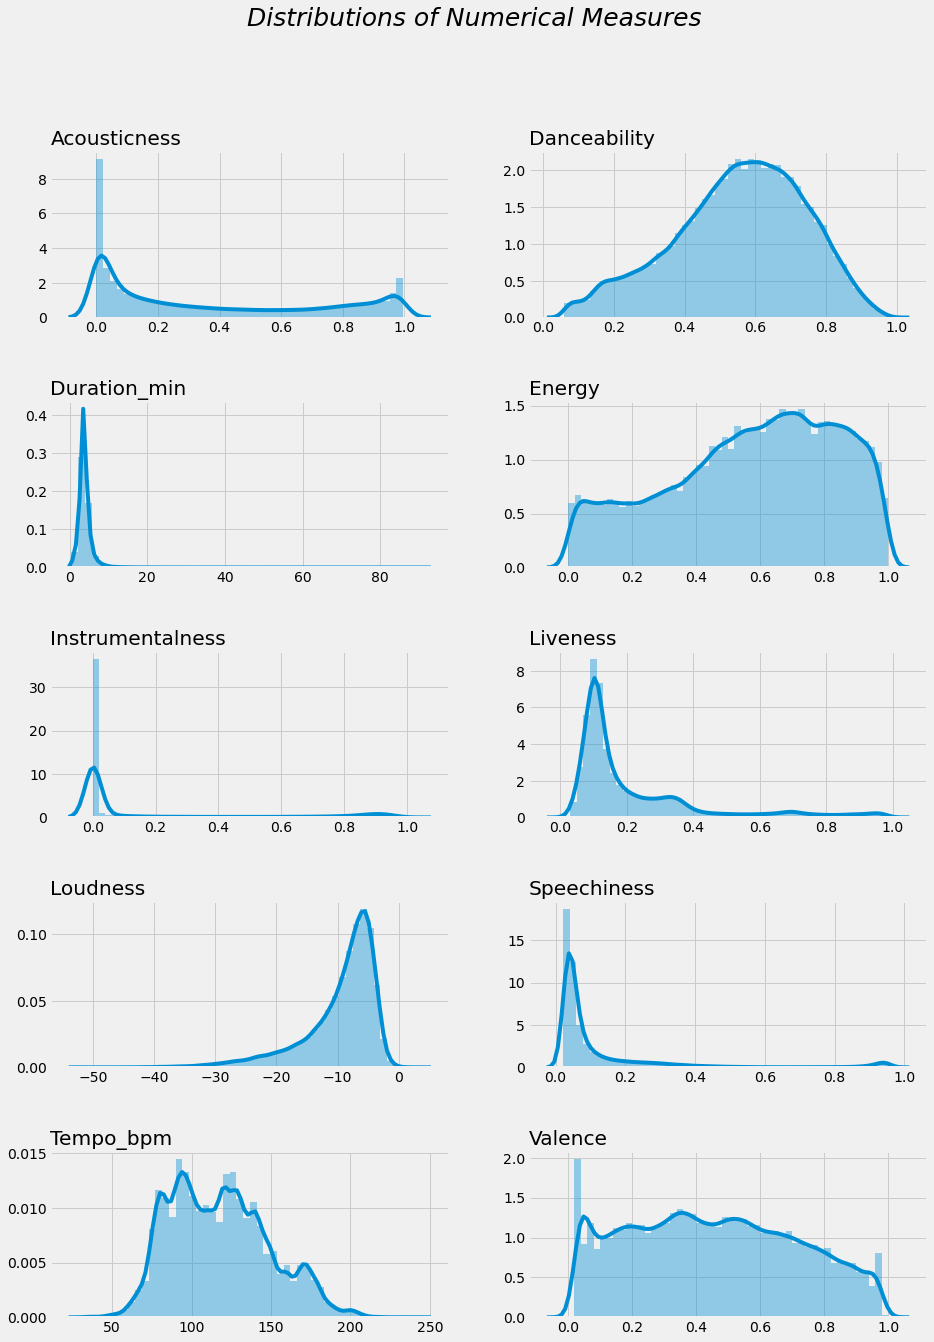

In [18]:
# Plot distributions of all numerical variables
plt.style.use('fivethirtyeight')
num_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
df_hists = df[num_cols].copy()

# Convert duration column from milliseconds to minutes
df_hists['duration_min'] = df_hists['duration_ms']/60000
df_hists = df_hists.drop(columns=['duration_ms'], axis=1)
df_hists = df_hists.rename(columns={'tempo': 'tempo_bpm'})  # Rename column to show units


conv_cols = ['acousticness', 'danceability', 'duration_min', 'energy', 'instrumentalness', 
             'liveness', 'loudness', 'speechiness', 'tempo_bpm', 'valence']
num=0
fig, ax = plt.subplots(figsize=(14,20))
for col in conv_cols:
    num+=1
    plt.subplot(5,2, num)
    sns.distplot(df_hists[col], hist=True)
    plt.xlabel('')
    plt.title(col.capitalize(), loc='left')
    plt.suptitle('Distributions of Numerical Measures', fontsize=25, style='italic')
    plt.subplots_adjust(hspace=0.5)
fig.savefig('./figure/numerical_variable_distis.png')

- **Acousticness**: Two centers with majority of tracks on the non-acoustic side. Even though electronic instruments were introduced at the turn of the 20th century, most genres of music remained acoustic up until around the 1970s when electronic music first started gaining popularity. Popular genres before then included Classical, Opera, Jazz, Blues, Soul, Country, Rock. With the following of Disco starting to build up in the 1970s, and with the introduction of the synthesizer and improved interfaces, music started gravitated towards electronic mediums with genres such as House, EDM, and Pop.

- **Danceability**: Relatively normal distribution centered at around 0.6 with a slight skew towards the left. Though many older pieces within the Classical genre are modeled after dances (Mazurka, Gavotte etc.), they do not fit as well into the modern criteria of tempo, rhythm stability, beat strength, and overall regularity.

- **Duration**: Majority of songs are under 10 minutes and centered around 5 minutes. The few outliers could be classical or opera pieces which tend to develop slower. A prime example would be Richard Wagner's Ring Trilogy which lasts 15 hours when taking the entire piece into account. With that said, Spotify has a tendency to split symphonic movements or operatic scenes into individual tracks which would reduce the spread.

- **Instrumentalness**: Two centers on both ends with very little occupying the range between. Most instrumental tracks are probably found within World, Soundtrack, and Classical genres, with most other genres using lyrics to convey its message. While the Classical repertoire spans many centuries, throughout the 20th century and more so into the 21st, its popularity has gradually diminished.

- **Liveness**: Right-skewed distribution centered around 0.1. Considering the cost and logistic challenges associated with arranging a live performance, this is not a surprise. Not to mention easier and easier public access to music through vinyls, CDs, torrenting, and now music streaming platforms like Spotify itself.

- **Loudness**: Left-skewed distribution. There's been mentions of an increasing number of music producers boosting the overall volume of tracks in attempts to have them "stick" better with listeners. That said, many streaming platforms do allow for volume normalization nowadays.

- **Speechiness**: Very right-skewed and centered around 0.05. This could be due to Spotify's limited utility for podcasts, talk shows, or audio books, with there only being a small hump on the right end of the distribution.

- **Tempo**: Tempo can be misleading since tempo isn't the only factor that affects the perceived pace of a track. The time signature also matters as 200 bpm in 2/4 can sound the same as 100 bpm in 4/4 time.

###### <br>

## Examine popularity across genres

''

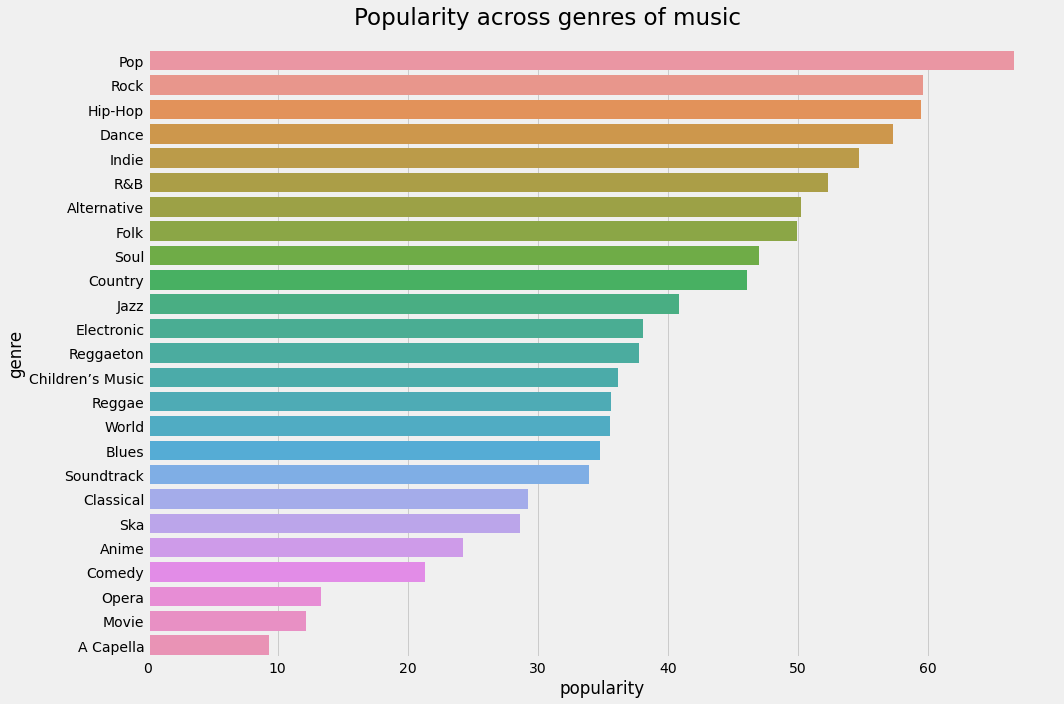

In [19]:
df_pop = df[['genre', 'popularity']].groupby('genre') \
                                    .mean() \
                                    .sort_values(by='popularity', ascending=False) \
                                    .reset_index()

fig, ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(y='genre', x='popularity', data=df_pop, orient='h')
ax.set_title('Popularity across genres of music', 
             size=23, x=0.44, y=1.03)
fig.tight_layout()
plt.savefig('./figure/popularity_by_genre.png')
;

Bar plot of popularity across genres generally matches expectations with genres like pop and hip-hop topping the chart, with niches like classical and anime close to the bottom. The order very roughly resembles the chronological order of their emergence and heyday of some genres:
- Blues: 1910s~
- Jazz: 1920s~
- Rock: 1950s~

###### <br>


## Comparing major and minor songs on the valence scale

In [20]:
df_major = df[df['mode']=='Major']
prop_major = len(df_major)/len(df)
mean_major = df_major['valence'].mean()
std_major = df_major['valence'].std()
print('Percentage of songs in major mode: ' + str(prop_major))
print('Mean valence of major songs: ' + str(mean_major))
print('Standard devation of valence in major songs: ' + str(std_major))

Percentage of songs in major mode: 0.652023702608748
Mean valence of major songs: 0.45525234517619295
Standard devation of valence in major songs: 0.26105376750907977


In [21]:
df_minor = df[df['mode']=='Minor']
prop_minor = len(df_minor)/len(df)
mean_minor = df_minor['valence'].mean()
std_minor = df_minor['valence'].std()
print('Percentage of songs in minor mode: ' + str(prop_minor))
print('Mean valence of minor songs: ' + str(mean_minor))
print('Standard devation of valence in minor songs: ' + str(std_minor))

Percentage of songs in minor mode: 0.347976297391252
Mean valence of minor songs: 0.45431172882193127
Standard devation of valence in minor songs: 0.25820044036300055


More major songs present in the data set by around 65%/35% split. Generally there are more major pieces written than minor ones.

''

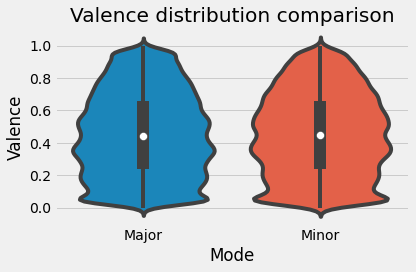

In [22]:
sns.violinplot(x='mode', y='valence', data=df)
plt.xlabel('Mode')
plt.ylabel('Valence')
plt.title('Valence distribution comparison', wrap=True)
plt.tight_layout()
plt.savefig('./figure/valence_dist_by_mode.png')
;

Turns out that major and minor songs have very similar distributions in regards to valence which is a surprising finding. To the modern western ear, the major mode tends to sound 'happier' and the minor mode 'somber', with composers alternating between the two modes within the same piece to depict swings in emotion. This does not hold true around the world however, as exemplified in Japanese traditional music (e.g. 'Sakura', a folk song in the minor mode that celebrates the Cherry Blossom Festival). The plot shows essentially no difference in the distribution of valence between the two modes.

###### <br>

## Examine relationship between valence and popularity

In [23]:
# Test pearson correlation between the two variables
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0][1]

valence = df['valence']
popularity = df['popularity']

r_val_pop = pearson_r(valence, popularity)

perm_replicates = np.empty(10000)

for i in range(10000):
    permuted_val = np.random.permutation(valence)
    perm_replicates[i] = pearson_r(permuted_val, popularity)
    
p = np.sum(perm_replicates >= r_val_pop) / 10000
print('Pearson-R Coefficient between Valence and Popularity: '+ str(r_val_pop))
print('p: ', p)

Pearson-R Coefficient between Valence and Popularity: 0.06005366766072194
p:  0.0


''

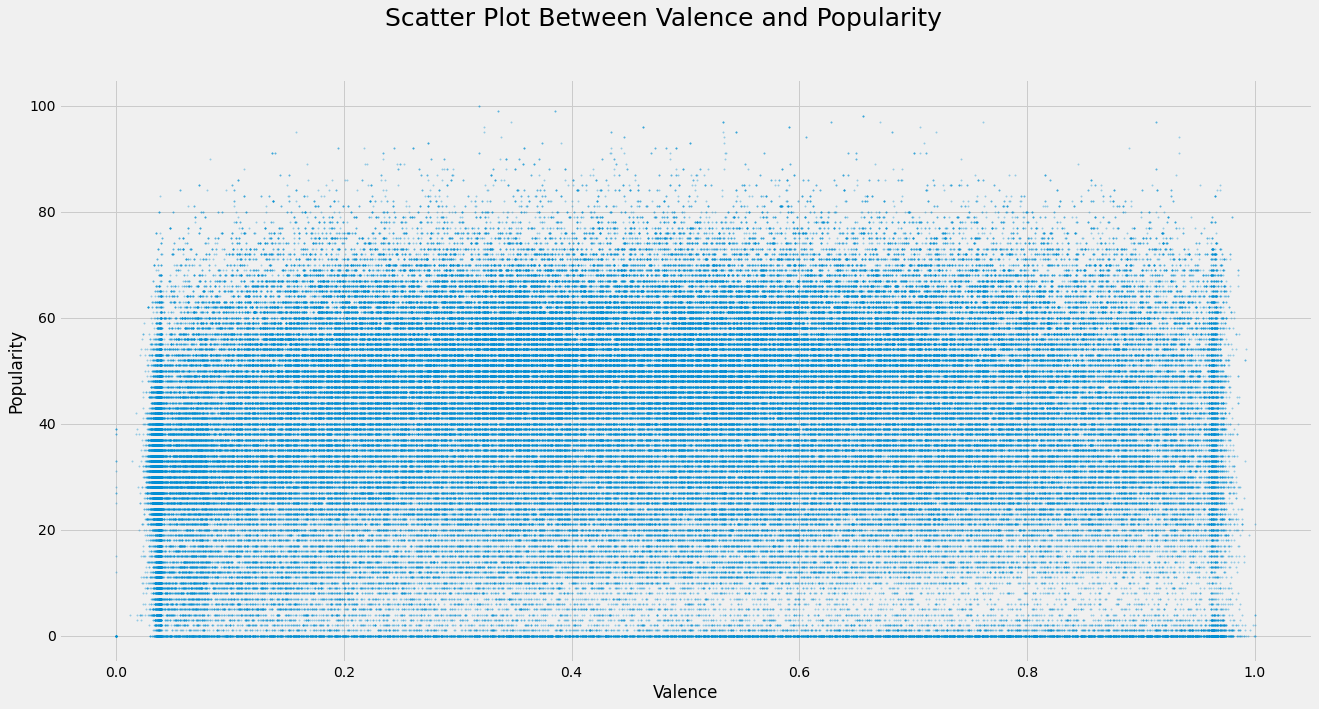

In [24]:
plt.figure(figsize=(20,10))
plt.scatter(x='valence', y='popularity', data=df, s=2, alpha=0.3)
plt.xlabel('Valence')
plt.ylabel('Popularity')
plt.suptitle('Scatter Plot Between Valence and Popularity', fontsize=25)
;

Both the Pearson-R Coefficient and plot demonstrate slim to none correlation between valence and popularity. This is contrary to my hypothesis coming in that songs on either ends of the spectrum will have more emotional impact and resonate better with the listener. It is unlikely that the data collection process controlled for equal representation of both variables.

###### <br>

## Examine major presence and valence across genres

In [25]:
# Selecting genres to work on, keeping in mind a good representation of the general spread
genre_list = ['R&B', 'Electronic', 'Hip-Hop', 'Children’s Music',
              'Classical', 'Pop', 'Reggae',
              'Jazz', 'Rock', 'Comedy', 'Soul']


# Create aggregate table looking at average valence and percentage of major mode across selected genres
df_g = df.copy().set_index(['genre'])
df_g = df_g.loc[genre_list, ['mode', 'valence']] \
           .reset_index()

#Create dummy column for 'mode'
df_g['major_y'] = df_g['mode'].apply(lambda x: 1 if x == 'Major' else 0)  
df_g = df_g.astype({'major_y': 'float'}) \
           .drop(['mode'], axis=1)
df_g_agg = df_g.groupby('genre') \
               .mean() \
               .rename(columns={'valence': 'valence_avg', 'major_y': 'major_perc'}) \
               .reset_index() \
               .sort_values(by=['valence_avg'])
df_g_agg

,genre,valence_avg,major_perc
1,Classical,0.214463,0.665730
3,Electronic,0.388129,0.531833
2,Comedy,0.412799,0.691942
7,R&B,0.450346,0.525245
4,Hip-Hop,0.464681,0.557757
10,Soul,0.480562,0.561888
6,Pop,0.481377,0.622483
5,Jazz,0.508961,0.532888
9,Rock,0.517113,0.741803
0,Children’s Music,0.532251,0.724112


In [26]:
# Melt table to create paired bar plot
# Both average valence and major percentage are on the same 0-1 scale
df_g_melt = pd.melt(df_g_agg, id_vars=['genre'], var_name='Measure', value_name='percentage')

''

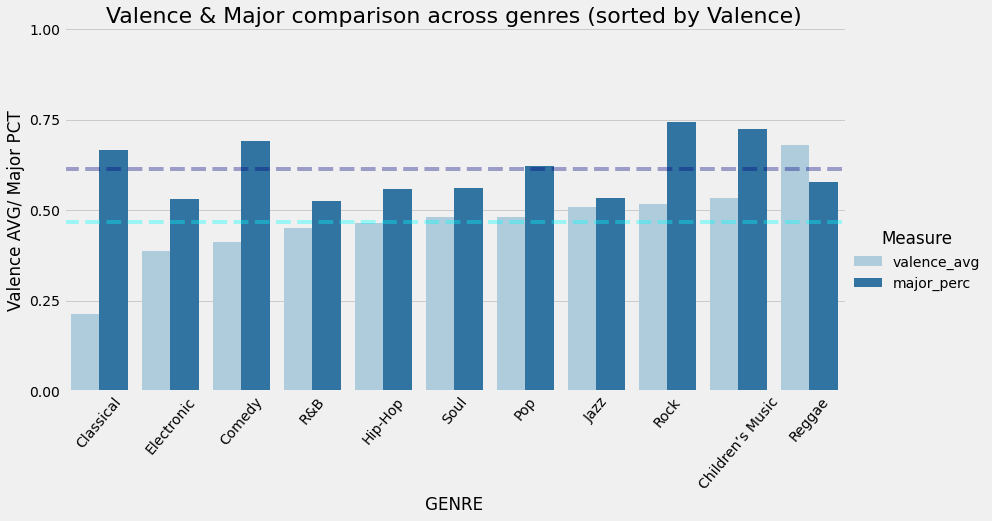

In [27]:
#Create paired bar plot to visualize disparity between major percentage and average valence
sns.catplot(x='genre', y='percentage', hue='Measure', data=df_g_melt,
            kind='bar', palette='Paired', height=6, aspect=2/1)
plt.ylim(0,1)
plt.xlabel('GENRE')
plt.ylabel('Valence AVG/ Major PCT')
plt.xticks(rotation=50)
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.title('Valence & Major comparison across genres (sorted by Valence)',
             size=22, y=1.03)

#Plot global averages as horizontal lines
pop_avg_val = df_g_agg['valence_avg'].mean()
pop_avg_maj = df_g_agg['major_perc'].mean()
plt.axhline(y=pop_avg_val, alpha=0.35, linestyle='--', color='aqua')
plt.axhline(y=pop_avg_maj, alpha=0.35, linestyle='--', color='navy')

plt.savefig('./figure/valence_major_comparison_by_genre.png')
;

Since both major percentage was normalized to match valence, I wanted to create a paired bar plot to examine the disparity between valence and dominance of major songs across genres, as well as the percentages themselves. Keep in mind that valence is supposedly a representation of the positiveness of a song.

**Observations**:
- Only jazz, rock, and reggae have valence of above 0.5, the only ones that can be generally categorized as 'happy-sounding' if treated as a binary variable.
- Reggae music has a high valence regardless of below-average major presence. It is also the only genre that has a higher average valence than major presence. From a personal perspective, they do tend to sound more vibrant and laid back, which might be due to a combination of other factors.
- Both Children's Music and Comedy, two genres that were initially presumed to have high valence due to the nature of their subjects, have below average valence scores even though their major presence is above the global average.
- The fact that classical music has above average major presence, but the lowest in valence at 0.21 goes further to show that key signature plays very little role in determining valence.

###### <br>

## Correlation heatmap of variables

In [28]:
# Check spread of values within 'key'
df['key'].value_counts()

C     27579
G     26390
D     24076
C#    23200
A     22671
F     20278
B     17661
E     17390
A#    15526
F#    15222
G#    15158
D#     7566
Name: key, dtype: int64

In [29]:
df['time_signature'].value_counts()

4/4    200760
3/4     24111
5/4      5238
1/4      2608
Name: time_signature, dtype: int64

#### Dropping:
- **Genre & artist_name & track_name**: Even though both might contribute to popularity (marketing tactics, fame etc.), dropping both since it is hard to account for those factors
- **track_id**: ID column
- **key & key_signature**: Since there is no intuitive effect a key of a track can have on popularity since intervals remain the same throughout different keys in the modern equal tempered system.There is also no dominant key looking at value counts.

#### Converting:
- **time_signature**: to a dummy variable of either 4/4 or 'not 4/4' seeing that 4/4 is predominant.

In [30]:
# Creating new dataframe for correlation matrix, and potentially for model fitting
df_cov = df.drop(columns=['genre', 'artist_name', 'track_name',
                          'track_id', 'key', 'key_signature']) \
           .copy()

# Create dummy variable for mode
mode_dummy = pd.get_dummies(df_cov['mode'])
df_cov = pd.concat([df_cov, mode_dummy], axis=1) \
           .drop(columns=['mode', 'Minor'])

# Create dummy variable for time_signature
df_cov['time_signature'] = df_cov['time_signature'].apply(lambda x: '4/4' if x=='4/4' else 'not_4/4')
time_dummy = pd.get_dummies(df_cov['time_signature'])
df_cov = pd.concat([df_cov, time_dummy], axis=1) \
           .drop(columns=['time_signature', 'not_4/4'])

df_cov.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Major,4/4
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814,1,1
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816,0,1
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368,0,0
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227,1,1
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390,1,1


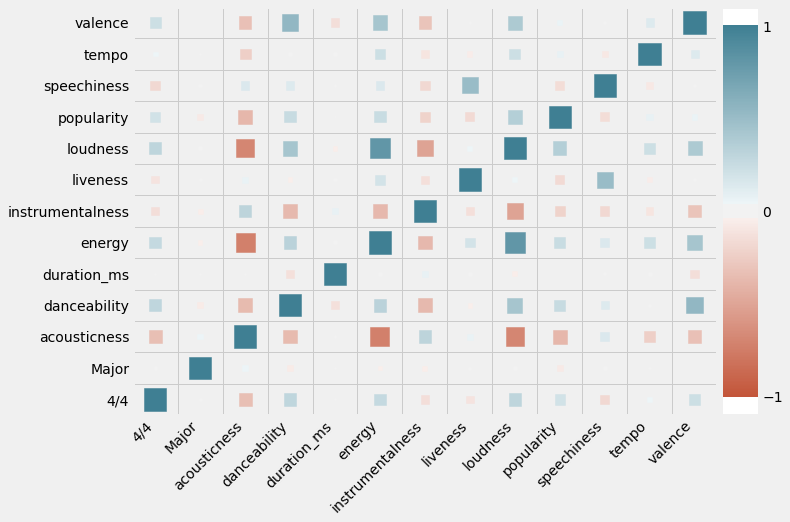

In [31]:
def heatmap(x, y, size, color):
    fig, ax = plt.subplots(figsize=(10,7))
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    
    n_colors = 256 
    palette = sns.diverging_palette(20, 220, n=n_colors) 
    color_min, color_max = [-1, 1] 

    def value_to_color(val):
        val_position = float((val - color_min)) / (color_max - color_min) 
        ind = int(val_position * (n_colors - 1)) 
        return palette[ind]
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1)
    ax = plt.subplot(plot_grid[:,:-1])

    ax.scatter(
        x=x.map(x_to_num), 
        y=y.map(y_to_num), 
        s=size * size_scale, 
        c=color.apply(value_to_color), 
        marker='s' 
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)
    
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) 

    col_x = [0]*len(palette) 
    bar_y=np.linspace(color_min, color_max, n_colors) 

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette),
        left=col_x, 
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) 
    ax.grid(False) 
    ax.set_facecolor('white') 
    ax.set_xticks([])
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) 
    ax.yaxis.tick_right() 
    

corr = df_cov.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') 
corr.columns = ['x', 'y', 'value']

heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)

#### *General*
##### Notable:
- Positive correlation between valence and danceability
- Positive correlation between energy and loudness
- Negative correlation between energy and acousticness
- Negative correlation between loudness and acousticness

#### *Popularity*
##### Notable:
- Positive correlation with loudness
- Negative correlation with acousticness

##### Weak:
- Positive correlation with being 4/4, danceability, energy
- Negative correlation with instrumentalness, liveness, speechiness

###### <br>

## Fitting a Model

Since target variable is numeric, and we know from the correlation matrix that most independent variables have slim to no correlation to popularity, both ridge regression and lasso regression are good candidates.

In [32]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics

In [33]:
# X and y split. Dummy encodings have already been completed in the last step
X = df_cov.drop('popularity', axis=1).columns
y = ['popularity']

In [34]:
params = {'alpha': [1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 50, 100]}

models = {'Lasso': GridSearchCV(Lasso(), param_grid=params, cv=5).fit(df_cov[X], df_cov[y]).best_estimator_,
          'Ridge': GridSearchCV(Ridge(), param_grid=params, cv=5).fit(df_cov[X], df_cov[y]).best_estimator_,}

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            X_train, X_test, y_train, y_test = train_test_split(data[X], 
                                                                data[y], 
                                                                test_size= 0.2)
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(X_train, 
                                                          y_train).predict(X_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(X_train, 
                                                           y_train).predict(X_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

test(models, df_cov)

,Lasso,Ridge
0,0.237341,0.237267
1,0.237249,0.237433


Both the lasso and ridge regression models leave much to be desired with scores revealed around 23% average R-Squared. There are many absent pieces of information that might prove useful, some might be more easily acquired than others
- **Chord Progressions**: are a cornerstone of western music and prove to be a defining factor for many genres. Many though not all pop songs are known for their simple four-chord progressions.
- **Marketing**: This could tie into the artist's fame, marketing cost & strategy. Though other than cost, the other two are relatively less quantifiable.
- **Release Date**: likely plays a big role in determining popularity due to ease of access and more avenues to gain exposure. Many tracks also gain an edge by way of the *mere exposure effect*, a psychological phenomenon by which people tend to develop a preference for things merely because they are familiar with them.